# Assignment 4

## Lecture 7 & 8 - Clustering & Probability Theory

## Learning Goals

* Learn how to **construct** and **train** K-means for **hard-clustering** task using `scikit-learn`. 
* Learn the importance of K-means initialization.
* Learn about the properties of K-means clusters.
* Learn how to use inertia and silhouette coefficient to choose the number of clusters k.
* Learn how to construct new features using clustering, and to leverage those for more expressive (supervised) models.
* Learn the basics of Bayesian probability theory
* Learn how to train a naive Bayes classifier

# Table of Contents
1. [Clustering](#Clustering)
2. [Bayes Classifier](#Bayes-Classifier)

# General Instructions
- Jupyter notebook is supposed to be run cell by cell in order, please do not skip any code cell, this will cause some errors. Also running cells back and forth sometimes might also incur errors. If you feel you lost your track, you can click "Kernel->Restart" from the menu to restart the process.
- Before submitting your assignment, ensure that it does not contain trivial errors by pressing the "validate" button at the top.
- Your implementations are supposed to be added to the places where it reads "YOUR CODE HERE". Please also remove the "raise NotImplementedError()" line before submitting.
- Please DO NOT change the metadata of any cell, cells for demo and instructions are not editable.
- Please DO NOT change the order of solution cell and test cell, you will lost points if the order is changed.
- You can copy lines of code from cells that are not editable, but please DO NOT copy and paste them as cells, this may incur validation error. 
- You can add extra cells or code to help double-check your solution, but please make sure that variables required by tasks are not overwritten, or just delete those extra cells before submitting.
- Please DO NOT change file names in you submission, renamed files can not be recognized by the grading system.
- Reading the documentation of Python libraries is always a good practice, all the Python libraries (Numpy, Pandas, Sklearn,etc.) we utilized in this course provide very well organized documentation for each method/class/function.

In [3]:
# Import libraries needed for this assignment
from re import findall # regular expressions
from time import time # library providing various time-related functions

import numpy as np # library for numerical computations (vectors, matrices, tensors)
import numpy.testing as np_testing # for tests
import matplotlib.pyplot as plt # library providing tools for plotting data
import pandas as pd

from sklearn.datasets import load_iris # function providing iris dataset
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans # library for K-Means clustering
from sklearn import metrics # library providing score functions, performance metrics and pairwise metrics and distance computations
from sklearn.metrics import mean_squared_error, confusion_matrix as calculate_confusion_matrix
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D # library for 3D axes object
from seaborn import heatmap

%matplotlib inline

# Clustering

Here we discuss about an unsupervised ML method [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis), which does not require a supervisor to provide the label values for any datapoint. Clustering methods aim to decompose datapoints into a few subsets which we refer to as clusters. They learn a hypothesis for assigning each data point either to one cluster or several clusters with different degrees of belonging.

Broadly speaking, clustering can be divided into two subgroups:

- **Hard Clustering**: In hard clustering, each data point either belongs to a cluster completely or not. 
- **Soft Clustering**: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. 

Clustering of unlabeled data can be performed with the module [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). Each clustering algorithm comes in two variants: a class ([python class](https://docs.python.org/3/tutorial/classes.html)), that implements the `fit.()` method to learn the clusters on training data, and a function, that, given training data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the `labels_` attribute. Here is the overview of [clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

In this assignment, we will use **K-means** to solve a **hard-clustering** task. 

<a id='A4.1'></a>
<div class=" alert alert-warning">
    <h2><b>Student task A4.1.</b> K-means for hard-clustering problem.</h2>

Now, your task is to use **K-means** for a **hard-clustering** problem. 
    
You can use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) to construct the model.
</div>

The **[KMeans](https://en.wikipedia.org/wiki/K-means_clustering)** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X = \{x_1,x_2,...,x_n\}$ into $K$ disjoint clusters $C_1,C_2,...,C_k$, each described by the mean $\mu_j$ of the samples in the cluster $C_j$, for $j \in \{1,2,3,...,k\}$ . The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion**:
$$
\mathop{min}\limits_{\mathbf{\mu}}
\sum^{k}_{j=1}
\sum^{}_{x_i\in C_j}
\| x_i - \mu_j\|^2
$$

Furthermore, since the total variance in the data is a constant, by minimizing the within-cluster (intra) variance we are also implicitly *maximizing* the between-cluster (inter) variance. As a result, K-means tries to find well separated spherical clusters with equal densities. More specifically, K-means can only produce convex clusters, which makes it less useful when the targeted/real clusters are strongly overlapping or entangled. And finally, whether or not there is actually any "clustering/grouping" we as humans might recognize or wish to find in the data, K-means **will** return us k cluster centroids, and those centroids will partition the input space in convex partitions using euclidean distance. It is solely on the analyst to interpret and validate the results using ingenuity and existing tools (goodness measures, visual inspection etc.).

## Loading Data

We will use the [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset). It is a classic and very simple multi-class classification dataset. This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. We use these four features for clustering. The true labels, see below `iris_data.target`, will be used to evaluate the performance of Kmeans method.

In [134]:
# load dataset
iris_data = load_iris()    # load the iris dataset
X = iris_data.data    # obtain features of datapoints
y = iris_data.target    # obtain labels of datapoints

# shape of samples
print(f'Shape of samples {X.shape}')    # print the shape of features
print(f'Target names {iris_data.target_names}')    # print all label names

Shape of samples (150, 4)
Target names ['setosa' 'versicolor' 'virginica']


##  Defining and Training Model
We use `KMeans()` and `.fit()` to train our model. Read more [parameter settings](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) in details. Please set the `random_state` as 0, and the `n_clusters` (which is the parameter k in k-means) so that you could hope to capture the different types of irises' - see the targets in the previous code cell; we'll be comparing those against K-means labels.

In [135]:
 # define and train model

# kmeans = ...
# kmeans.fit(...)

# YOUR CODE HERE
#raise NotImplementedError()
kmeans = KMeans(random_state=0, n_clusters=3, n_init=10)
kmeans.fit(X,y)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [136]:
# this cell is for A4.1 tests


## Evaluation

Cluster quality metrics evaluated (see [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) for definitions and discussions of the metrics):

| Shorthand | full name |
| ---- | ---- |
| homo | homogeneity score |
| compl | completeness score |
| v-meas | V measure |
| ARI | adjusted Rand index |
| AMI | adjusted mutual information |
| silhouette | silhouette coefficient |

**NOTE**: Homogeneity/Completeness score, V measure, ARI and AMI are all **external validity indices** - so called since they require labels (i.e., external information). Silhouette coefficient on the other hand only requires the data points and cluster assignments, and is an example of an **internal validity index**. Validity indices can be used to evaluate single clustering, choose k, or compare multiple clusterings. However, there are some nuances in the use of these measures and how they should be used with different clustering models, which goes beyond this course.
These and other validity indices are dealt with in more depth in the course CS-E4650 (Methods of Data Mining). 

In [137]:
# calculate the running time
t0 = time()
estimator = KMeans(n_clusters=3, random_state=0, n_init = 10).fit(X)
fit_time = time() - t0
results = [fit_time, estimator.inertia_]

# define the metrics which require only the true labels and estimator labels
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
]
results += [m(y, estimator.labels_) for m in clustering_metrics]

# the silhouette score requires the full dataset
results += [
        metrics.silhouette_score(
            X,
            estimator.labels_,
            metric="euclidean",
            sample_size=300,
    )
]

# show the results of each metric and print them
formatter_result = (
        "{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(66 * "_")
print("time\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
print(66 * "_")

__________________________________________________________________
time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
0.013s	79	0.751	0.765	0.758	0.730	0.755	0.553
__________________________________________________________________


Let's visualize the clustering results.

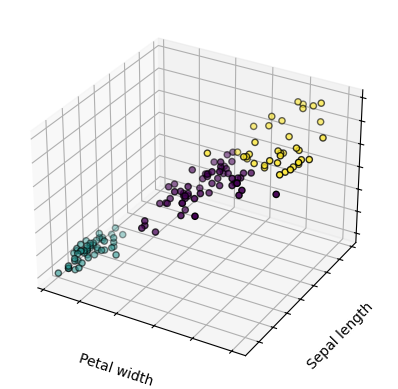

In [138]:
labels = kmeans.labels_    # obtain clustering labels
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')    # plot a scatter plot of labels vs. X with varying marker size or color
ax.set_xticklabels([])    # leave the text values blank of the tick labels
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Petal width')    # set the label for the x/y/z-axis
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

<a id='D4.1'></a>
<div class=" alert alert-info" >
    
## Demo
### The importance of initialization   
    
Here you can visually explore the sensitivity of K-means to initialization, and the effect standardization can have on it.  
</div>

The problem of finding k globally optimal centroids is strictly speaking too hard for us to solve in finite time. We can still find *good* solutions using an iterative approach (see 'algorithm 12' in ML book chapter 8.1). However, the solutions we find are only locally optimal and there is always the risk that we get stuck in a very suboptimal solution. Most importantly, this means that our solution depends on our initial guess for the centroids. Therefore, it is usually a good practice to run the K-means algorithm multiple times using different initial centroids, and then choose based on some goodness measure or a validation index - or if the data is low dimensional, based on visualization. 

First, let's create a toy dataset with 2 distinct clusters:

In [7]:
#Do not change the seed
np.random.seed(0)
n=500
Xdemo=np.random.multivariate_normal([0,5/2],np.diag([20,5/8]),n)
Xdemo=np.vstack((Xdemo,np.random.multivariate_normal([0,-5/2],np.diag([20,5/8]),n)))

Now, let's choose 2 random points from the dataset as our initial cluster centroids, and then cluster and plot the result as well as the initial centroids. The 'n_init=1' is specifying that we do not want multiple re-starts of the algorithm, as we are using our own initial centroids.

**NOTE**: You can keep running the cell multiple times (hold ctrl + press enter)

**NOTE**: You can also try a more sophisticated initialization scheme ([`k-means++`](https://en.wikipedia.org/wiki/K-means%2B%2B))   - it is the sklearn's default K-means initialization when you don't provide the initial centroids.

## Here we use numpy's random.choice to choose indeces of inital centroids 

In [23]:
init=Xdemo[np.random.choice(np.arange(Xdemo.shape[0]),2, replace=False),:]

# ...and then pass those initial centroids to K-means

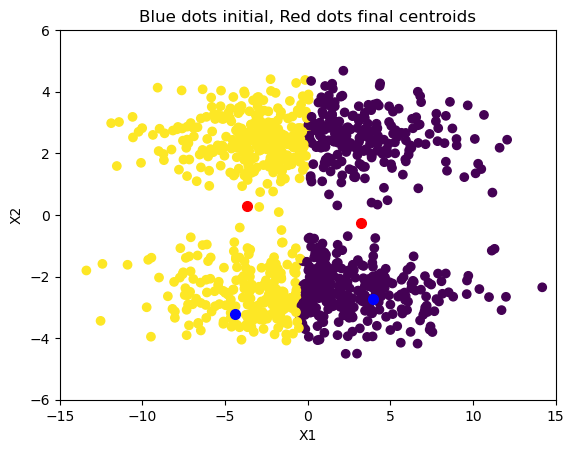

In [24]:
kmeans=KMeans(n_clusters=2, init=init, n_init=1).fit(Xdemo)

plt.scatter(Xdemo[:,0],Xdemo[:,1],c=kmeans.labels_)
plt.plot(init[:,0],init[:,1],'bo', markersize=7)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro', markersize=7)
plt.xlim([-15,15])
plt.ylim([-6,6])
plt.title('Blue dots initial, Red dots final centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Only very rarely are the initial centroids chosen such that the algorithm is able to distinguish the 2 distributions (if you keep running the cell you will eventually succeed).  

In this particular case, we can try to mitigate this sensitivity to initialization by standardizing our features using Sklearn's ['StandardScaler'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [25]:
# Sklearn way
Xs = StandardScaler().fit_transform(Xdemo)

In [26]:
# Manual way
#Xs = (Xdemo-Xdemo.mean(axis=0))/Xdemo.std(axis=0)

**And again using either randomly chosen data points or k-means++ for initial centroids:**

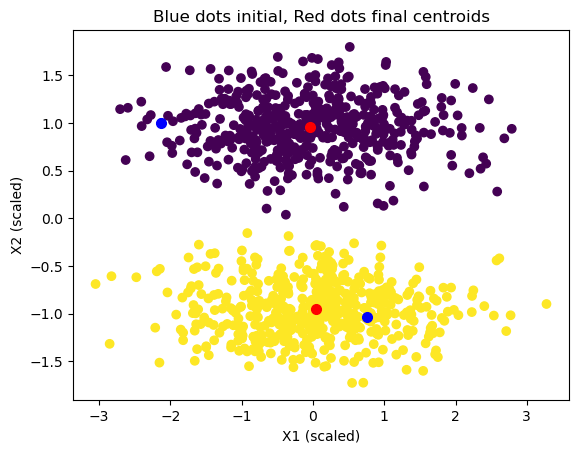

In [27]:
# Initial centroids as random data points
init=Xs[np.random.choice(np.arange(Xs.shape[0]),2, replace=False),:]
kmeans=KMeans(n_clusters=2, init=init, n_init=1).fit(Xs)

plt.scatter(Xs[:,0],Xs[:,1],c=kmeans.labels_)
plt.plot(init[:,0],init[:,1],'bo', markersize=7)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro', markersize=7)
plt.title('Blue dots initial, Red dots final centroids')
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()

**(NOTE the different X1, X2 scales)**

Now K-means has no trouble finding the clusters, even with poor initial centroids. As to the effectiveness of scaling, this is a somewhat "cherry-picked" example: In real world task, decision to normalize or standardize your data should be based on your understanding of the data. E.g., if there are features that do not have the same units and are on wildly differing scales, while your prior assumption is that those features are likely to be equally significant for the learning task; it is appropriate to standardize them. However, if your features have the same units (e.g., both are m/s) and you have no information based on which you could conclude about their relative significance, you should not scale the data. 

<a id='A4.2'></a>
<div class=" alert alert-warning">
    
## Student Task A4.2:
Standardization clearly had an effect on convergence in the previous demo. Based on the scatter plot of the data, could you come up with an even simpler feature transformation that would make the clustering task easier? If you feel unsure about the answer, you can always modify the previous demo and try different approaches, or plot histograms of the features. Answer by setting the 'Answer' variable to the index of the answer that you consider correct. 
    
* Answer 1: Shift the data by some constant factor.
* Answer 2: Use just one of the features - either one will work.
* Answer 3: Use just one of the features - 2nd feature will work.
    
</div>

In [29]:
## set Answer to the index of the correct answer (e.g., Answer = 1 if you think Answer 1 is correct)

# Answer  = ...   

# YOUR CODE HERE
#raise NotImplementedError()
Answer = 2

# sanity check datatype of Answer_Q1
assert isinstance(Answer, int), "Please use datatype 'int' for your answer"

In [30]:
# This is the test cell for A4.2


<a id='D4.2'></a>
<div class=" alert alert-info" >
    
## Demo
    
### The nature of K-means solutions.
    
Here we can inspect how the clustering evolves through iterations. As explained, in addition to minimizing inertia, the K-means objective is implicitly also maximizing the separation between clusters:

</div>

K-means aims to minimize:

$$
\sum^{}_{x_i\in C_j}
\| x_i - \mu_j\|^2
$$

for each cluster. Equivalently we could minimize within-cluster pairwise squared deviations:

$$
\dfrac{1}{\mid C_j\mid}
\sum^{}_{x,y\in C_j}
\| x - y\|^2
$$

and as the total variance in the data remains constant, minimizing the within-cluster deviations will also result in maximizing the pairwise deviations for data points in different clusters (between-cluster deviations).

**NOTE: You can change the random seed to test different initializations.**

Stop Iteration at
9th step
Final centroids: 
[[ 0.04 -0.95]
 [-0.04  0.95]]


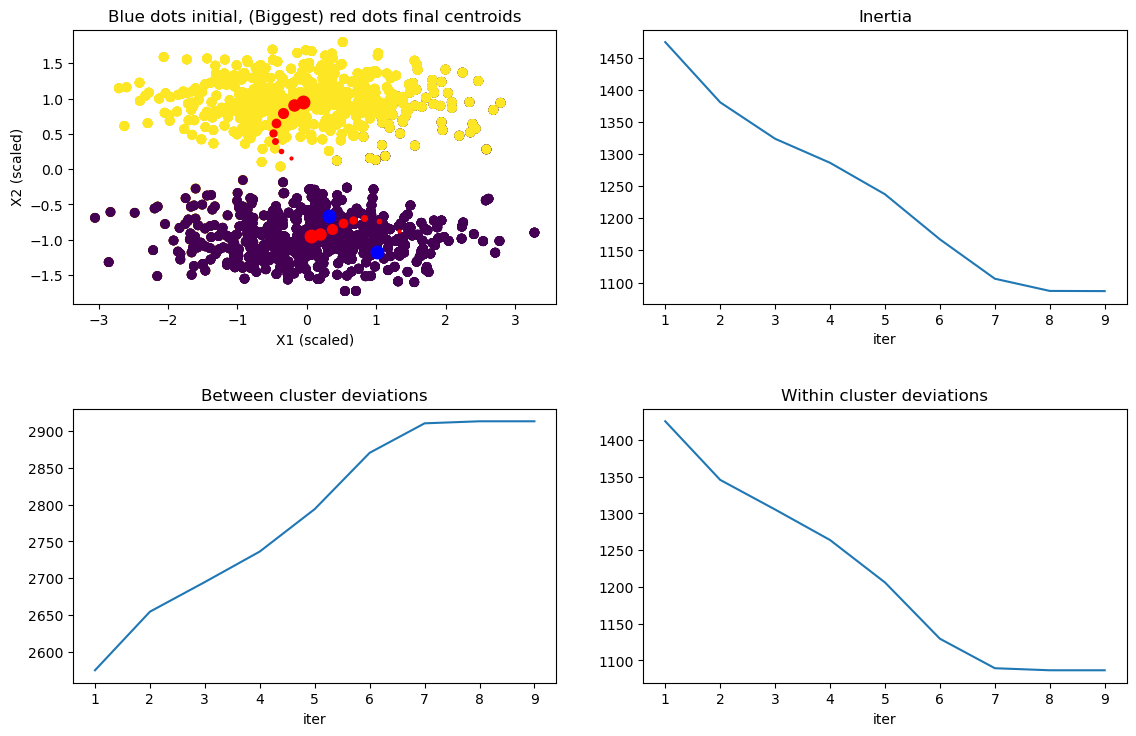

In [32]:
# Note: this cell is editable
np.random.seed(6)   

#Alias for pairwise distance function
DIST=metrics.pairwise_distances
init=Xs[np.random.choice(np.arange(Xs.shape[0]),2),:]
total_deviations=(DIST(Xs,Xs)**2).sum()/Xs.shape[0]
inertia=[]
between=[]
within=[]
plt.figure(figsize=(12,8))

# Hold previous value of inertia to determine when the clustering
# stops improving (initial value can be any large value)
inertia_prev = 1e12
plt.subplot(2,2,1)
for i in range(1,100):
    
    # We are manually iterating with KMeans 
    kmeans=KMeans(n_clusters=2, init=init, n_init=1, max_iter=1).fit(Xs)
    plt.scatter(Xs[:,0],Xs[:,1],c=kmeans.labels_)
    plt.xlabel('X1 (scaled)')
    plt.ylabel('X2 (scaled)')
    if(i==1):
        plt.plot(init[:,0],init[:,1],'bo', markersize=9)   
    else:
        plt.plot(init[:,0],init[:,1],'ro', markersize=i)
    
    #Hold the centroids for next iteration
    init=kmeans.cluster_centers_
    
    n0=np.sum(kmeans.labels_==0) # number of points in cluster 0
    n1=np.sum(kmeans.labels_==1) # number of points in cluster 1
    x0=Xs[np.where(kmeans.labels_==0)[0],:] #points in cluster 0
    x1=Xs[np.where(kmeans.labels_==1)[0],:] #points in cluster 1
    w0 = .5*(DIST(x0,x0)**2).sum()/n0 # deviations within cluster 0
    w1 = .5*(DIST(x1,x1)**2).sum()/n1 # deviations within cluster 1
    
    
    inertia.append(kmeans.inertia_)
    within.append( w0 + w1 )
    between.append( total_deviations - w0 - w1 )
    
    if(np.isclose(kmeans.inertia_,inertia_prev, rtol=1e-3)):
        plt.title('Blue dots initial, (Biggest) red dots final centroids')
        print('Stop Iteration at')
        print('{}th step'.format(i))
        print('Final centroids: \n{}'.format(np.round(kmeans.cluster_centers_,2)))
        break
    else:
        inertia_prev=kmeans.inertia_


plt.subplot(2,2,2)
plt.plot(np.arange(1,len(inertia)+1),inertia)
plt.title('Inertia')
plt.xlabel('iter')
plt.subplot(2,2,3)
plt.plot(np.arange(1,len(between)+1),between)
plt.title('Between cluster deviations')
plt.xlabel('iter')
plt.subplot(2,2,4)
plt.plot(np.arange(1,len(within)+1),within)
plt.title('Within cluster deviations')
plt.xlabel('iter')
plt.gcf().tight_layout(pad=3.0)
plt.show()

<a id='A4.3'></a>
<div class=" alert alert-warning">

## Student task A4.3. Choosing k for K-means.

Now, your task is to use inertia and silhouette coefficient to choose a good value for parameter k. 
    
You can use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) to construct the model, it's attribute **.inertia_** for inertia, and [`sklearn.metrics.silhuette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for silhuette coefficient. 
</div>

The K-means model requires us to provide the parameter k. With low-dimensional or otherwise trivial data this might be easy to conclude based on visual exploration. However, in many real world scenarios it is hardly a trivial task. In addition to previously mentioned validity indices, the value of the clustering objective (**inertia**) itself can be used to evaluate the clustering at different values of k. And properly interpreted, the inertia can help us to choose the value for k. 

The most basic approach to choosing k is called **the elbow method**. In elbow method we plot the value of inertia with different values of k, and choose the smallest k that produces "sufficiently low values of inertia." In practice this is done by looking for the point where the inertia plot is becoming less steep ("elbow" in the curve). This typically occurs when K-means is in some sense starting to overfit, i.e., instead of adding new clusters to capture truly separated sets of data points, it is starting to partition already compact clusters into smaller parts which are not well separated. 

As an additional method, we also use Silhuette coefficient/index (**SI**) to infer a good value for k. Higher values are better, and ideally we'd hope to find a peak.

### Let's load and visualize the data:

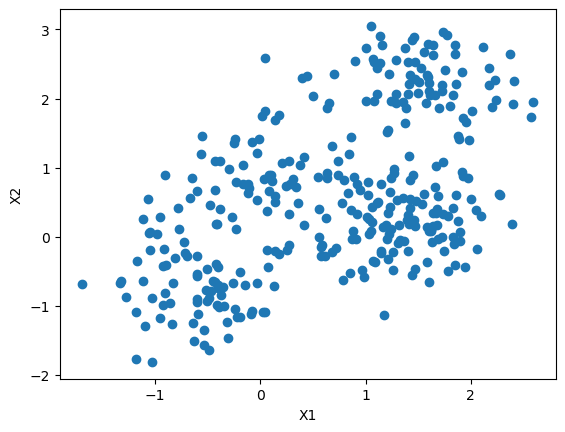

In [37]:
X = pd.read_csv('chooseK.csv').to_numpy()

plt.scatter(X[:,0],X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Your task:

Fit K-means model using the whole data X, for each value of k=2,3,...,6, and calculate SI for each instance and collect the inertias and SI's in python lists.

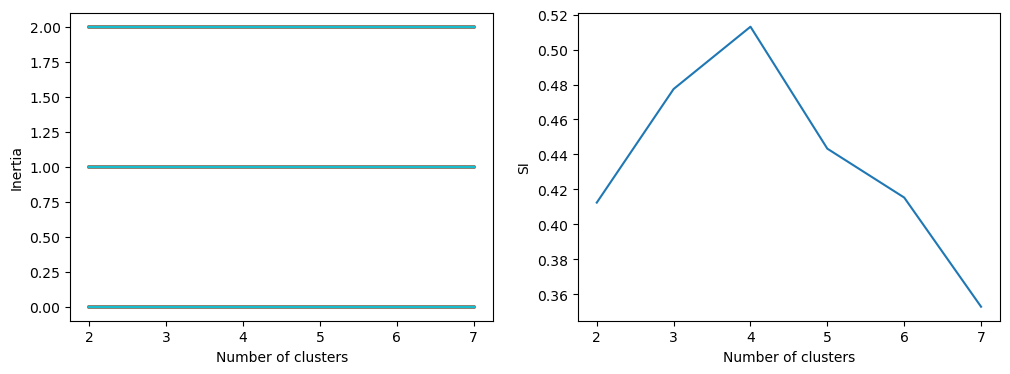

In [43]:
## append the si and inertia values to these lists 
inertia = []
SI = []


## Write a loop, and within it fit Kmeans on X with k=2,3,...,7 clusters
## using following variable names:

# for k in range(2, 8):

    ## initialize and train the model (for each k), it is recommended to use
    ## large enough value (e.g. 10) for n_init to ensure good results
    # kmeans = 
    
    ##calculate si
    # si = 
    
    ##...and append SI and inertia (for each k) to corresponding lists
    # inertia...
    # SI...

# YOUR CODE HERE
from sklearn.metrics import silhouette_score
#raise NotImplementedError()
for k in range(2,8):
    kmeans = KMeans(n_init=10, random_state=0, n_clusters=k)
    kmeans.fit(X,y)
    
    si = silhouette_score(X, kmeans.labels_)
    
    inertia.append(y)
    SI.append(si)

# sanity check
assert len(SI) == len(inertia) == 6 , "You should be getting 6 values for SI and inertia!"

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.arange(2,8),inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(2,8))
plt.subplot(1,2,2)
plt.plot(np.arange(2,8),SI)
plt.xlabel('Number of clusters')
plt.ylabel('SI')
plt.xticks(np.arange(2,8))
plt.show()

In [ ]:
# This cells is for A4.3 tests


<a id='A4.4'></a>
<div class=" alert alert-warning">
    
## Student Task A4.4:
    
Based on the plotted Inertia and SI, which k (number of clusters) would be the best choice?
    
</div>

In [44]:
## set variable Best_k to the correct answer (e.g., Best_k=2 if you think answer k=2 is correct)

# Best_k  = ...  

# YOUR CODE HERE
#raise NotImplementedError()
Best_k = 4

In [45]:
# This cells is for A4.4 tests


We can now plot the results:

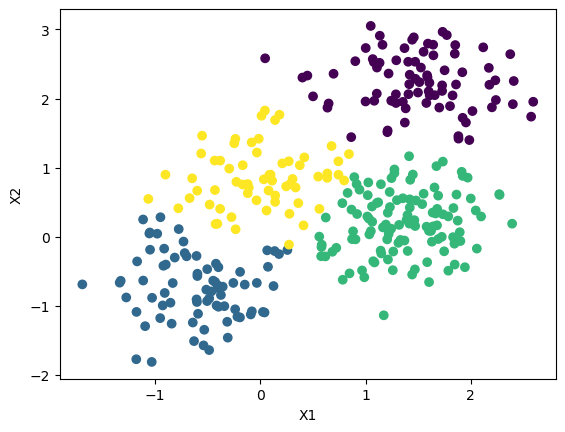

In [46]:
km=KMeans(n_clusters=Best_k, n_init=10).fit(X)
plt.scatter(X[:,0],X[:,1], c=km.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<a id='D8.3'></a>
<div class=" alert alert-info" >
    
## Demo
    
### The nature of K-means solutions (continued).
    
We can also inspect how the algorithm partitions the input space. 
</div>

In [47]:
X = pd.read_csv('chooseK.csv').to_numpy()

We will use the same data as in the previous task. First, let's create a meshgrid over the input space - this helps us to visualize the cluster assignments in the input space more broadly:

In [48]:
xx,yy = np.meshgrid(np.linspace(-2,3.0,100),np.linspace(-2.5,4,100))
xx,yy=xx.reshape(-1,1),yy.reshape(-1,1)
XX=np.hstack((xx,yy))

Then, we create an iteration counter and choose initial centroids at random from the data. 

**NOTE:** You need to run this cell before starting to run the cell after it.

In [50]:
np.random.seed(1) #remove or comment-out this line to test different initializations
it=0
inertia_prev=1e12
init=X[np.random.choice(np.arange(X.shape[0]),Best_k, replace=False),:]

Now, we can run the K-means one iteration at the time, by setting 'max_iter=1' and taking the new updated centroids as the next initial points. We are also using the trained K-means instance to predict for those previously created grid points.

**NOTE:** You can hold 'Shift' and press 'Enter' to run the cell one time. When the clustering objective is no longer improving, the code will print a message to stop iterating. If you wish to repeat this task, e.g., with different initial points, just run the above code cell again with necessary modifications.

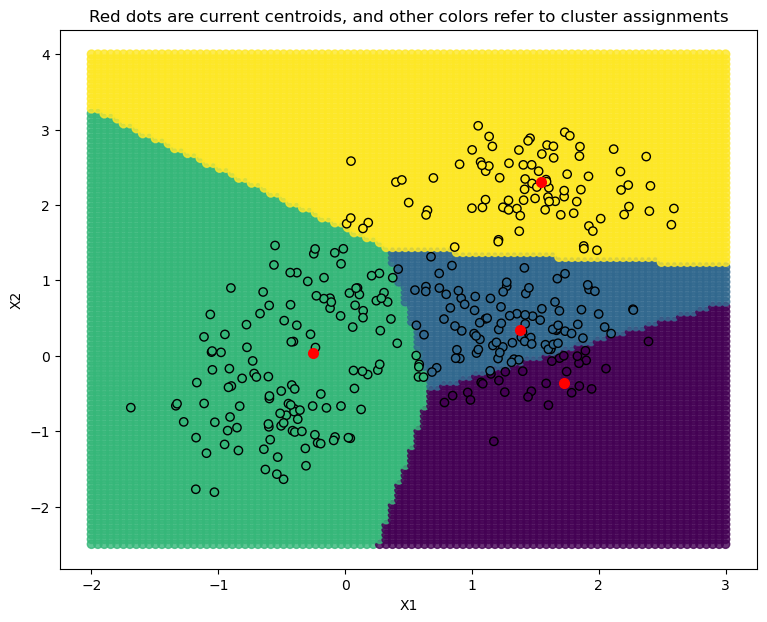

In [51]:
kmeans=KMeans(n_clusters=Best_k, init=init, n_init=1, max_iter=1).fit(X)
init=kmeans.cluster_centers_
it+=1

if(np.isclose(kmeans.inertia_,inertia_prev, rtol=1e-3)):
        print('Stop Iteration at')
        print('{}th step'.format(it))
else:
    inertia_prev=kmeans.inertia_
    
plt.figure(figsize=(9,7))
plt.plot(init[:,0],init[:,1],'ro', markersize=7)
plt.scatter(xx,yy,c=kmeans.predict(XX), alpha=.8)
plt.scatter(X[:,0],X[:,1],c=kmeans.predict(X),edgecolors='black')#'blue')
plt.title('Red dots are current centroids, and other colors refer to cluster assignments')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<a id='A8.4'></a>
<div class=" alert alert-warning">
    
## Student Task A4.5:
    
Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: For an arbitrary dataset, can we choose k such that clustering error goes to zero?
- Answer 1: Yes
- Answer 2: No
- Answer 3: It depends on the data.  

Question 2: Do you agree with the following statement: Lower clustering (mean distance to centroids) error always indicates a more usable model.
- Answer 1: Yes.
- Answer 2: No.  

Question 3: Do you agree with the following statement: Scikit-learn function kmeans.fit( ) might find different number of cluster means/centroids than the given k (n_clusters parameter).
- Answer 1: Yes.  
- Answer 2: No.

    
</div>

In [52]:
## set Answer_Q1 to the index of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)

# Answer_Q1  = ...  

## set Answer_Q2 to the index of the correct answer for Question 2 

# Answer_Q2 = ...   

## set Answer_Q3 to the index of the correct answer for Question 3 

# Answer_Q3 = ... 

# YOUR CODE HERE
#raise NotImplementedError()
Answer_Q1 = 2
Answer_Q2 = 2
Answer_Q3 = 2

# sanity check datatype of Answer_Q1
assert isinstance(Answer_Q1, int), "Please use datatype 'int' for your answer"

In [ ]:
# This cells is for A4.5 tests


In [ ]:
# This cells is for A4.5 tests


In [ ]:
# This cells is for A4.5 tests


<a id='A8.5'></a>
<div class=" alert alert-warning">
    
## Student task A4.6. 
    
### Using clustering to construct new features.

Now, your task is to leverage K-means clustering to construct new features for a supervised learning task using linear regression.
</div>

Assuming our dataset consists of four data points:

\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  x^{(1)}   \\
                  x^{(2)}   \\
                  x^{(3)}   \\
                  x^{(4)} 
               \end{pmatrix} 
\end{equation}

which have been clustered into 2 clusters according to: 

\begin{equation}
  \mathbf{Y} = \begin{pmatrix}
                  0   \\
                  0   \\
                  1   \\
                  1 
               \end{pmatrix} 
\end{equation}

We can construct new features $\mathbf{x_1,x_2}$ using the cluster assignments. We do it using the following logic: If the i'th data point $x^{(i)}$ is assigned to cluster 0, we set $x_1^{(i)}=x^{(i)}$, and if it is assigned to cluster 1, we set $x_2^{(i)}=x^{(i)}$. Our 4 datapoints, first 2 assigned to cluster 0, and the last 2 to cluster 1, would produce the following features:

\begin{equation}
  \mathbf{X_{new}}= \begin{pmatrix}
                  x^{(1)} & 0  \\
                  x^{(2)} & 0  \\
                  0 & x^{(3)}  \\
                  0 & x^{(4)}
               \end{pmatrix} 
               = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} \\
                  x_1^{(3)} & x_2^{(3)} \\
                  x_1^{(4)} & x_2^{(4)}
               \end{pmatrix}
\end{equation}


This is effectively the same as partitioning the data using the cluster assignments into 2 (or k more generally) disjoint datasets and training a distinct model with each partition. So, with the previous example we would get 2 models:

$$
Model_1: \alpha_1 x_1 + \beta
$$
and
$$
Model_2: \alpha_2 x_2 + \beta
$$

However, this approach is limited by the fact that both models have a shared constant term $\beta$, which may or may not be appropriate for the task at hand. We can make the "combined" model slightly more expressive by adding a separate constant term $\mathbf{x_c}$ in our features for cluster 1:

\begin{equation}
  \mathbf{X_{new}}= \begin{pmatrix}
                  x^{(1)} & 0 & 0 \\
                  x^{(2)} & 0 & 0  \\
                  0 & x^{(3)} & 1  \\
                  0 & x^{(4)} & 1
               \end{pmatrix} 
\end{equation}

which equals training 2 full models (on their respective partitions of the data):

$$
Model_1: \alpha_1 x_1 + \beta_1
$$
and
$$
Model_2: \alpha_2 x_2 + \beta_2 \\
$$
or a combined model:
$$
Model_{1,2}: \alpha_1 x_1 + \alpha_2 x_2 + \beta_2 x_c + \beta_1
$$

(this parameterization assumes the linear model has an intercept term)

### Below is a class for constructing the features:

**Study how the class is implemented, and what are the parameters. Its fit, transform and fit_transform addhere to the same logic as sklearn's classes you have previously used.**

In [5]:
class ClusteredFeatures:
    
    def __init__(self, n_clusters, add_constant=False, random_state=0):
        self.random_state = random_state
        self.n_clusters=n_clusters
        self.add_constant=add_constant
        self.kmeans=None
    
    def fit(self,x):
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init = 10, random_state=self.random_state).fit(x)
    
    def transform(self,x):
        assert self.kmeans is not None, 'You have to call fit before transform!'
        
        #Number of clusters
        k=self.kmeans.n_clusters
        #Cluster assignments
        assignments=self.kmeans.predict(x)

        #Initialize new features as zeros
        x_new=np.zeros((x.shape[0],k))
        # This creates a boolean indices
        bool_ind=(np.arange(k).reshape(-1,1)==assignments).T
        # Set new features to input features based on boolean indices
        x_new[bool_ind]=x.reshape(-1)

        #Add k-1 constant terms
        if(self.add_constant):
            for j in range(1,k):
                ones = np.zeros((x.shape[0],1))
                ones[np.where(assignments==j)]=1
                x_new=np.hstack((x_new,ones))

        return x_new
        
    def fit_transform(self, x):
        self.fit(x)
        return self.transform(x)

Here is an "alias" for mse function:

In [6]:
MSE = mean_squared_error

you can use it in place of the mean_squared_error function. This is sometimes handy to make your code more concise and less cluttered.

## Let's load some toy data:

In [7]:
data=pd.read_csv('featuresK.csv').to_numpy()
x_train,y_train = data[:,0].reshape(-1,1),data[:,1]

... and see how the data is clustered (based on the feature alone):

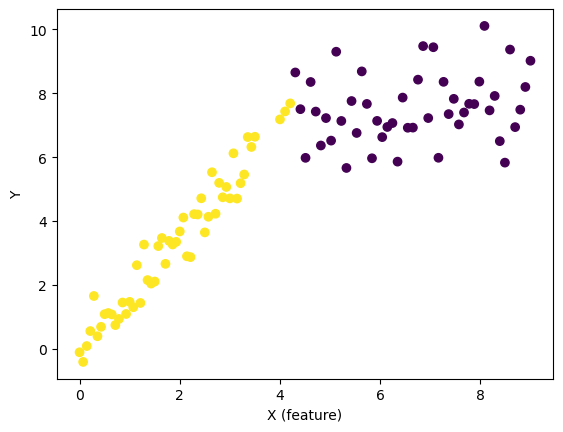

In [8]:
km = KMeans(n_clusters=2, n_init = 10).fit(x_train)
plt.scatter(x_train,y_train,c=km.labels_)
plt.xlabel('X (feature)')
plt.ylabel('Y')
plt.show()

Let's train a simple LinearRegression on the training data. We will also define a grid of evaluation points for predicting with the trained model. We use numpy's [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to get 50 equally spaced data points $x_{eval}\in[0,9]$. This linear model is our baseline solution:

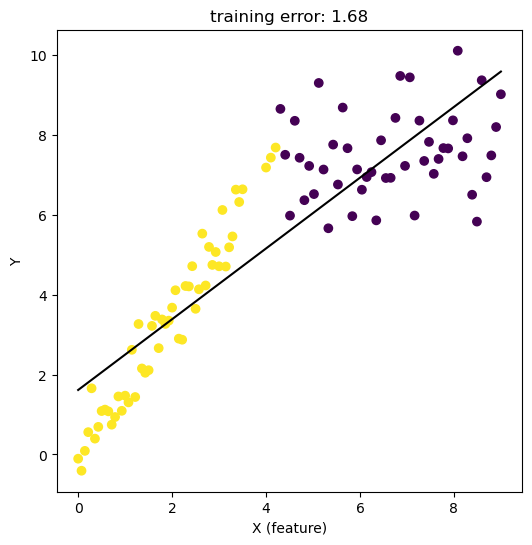

In [9]:
#Baseline model
lm=LinearRegression().fit(x_train,y_train)
#Evaluation points 
x_eval = np.linspace(0,9, 50).reshape(-1,1)
#prediction using the evaluation points (for plotting)
y_eval=lm.predict(x_eval)
#predictions for training error
yhat_train=lm.predict(x_train)
mse_train=MSE(y_train, yhat_train)

#plotting the results
plt.figure(figsize=(6,6))
plt.plot(x_eval,y_eval,'k-')
plt.scatter(x_train,y_train, c=km.labels_)
plt.title('training error: {}'.format(round(mse_train,2)))
plt.xlabel('X (feature)')
plt.ylabel('Y')
plt.show()

Clearly, the data seems to have 2 different modalities, and the fit is a compromise between the two.

In [10]:
## In this cell, you can first try ClusteredFeatures
## with a small subset of data, for example with x_train[:10]
## and see how the class works. There are no tests for this (not mandatory).

# x_tmp = x_train[:10]
# ...
x_tmp = x_train[:10]
cl = ClusteredFeatures(2, add_constant=True)
cl.fit_transform(x_tmp)

array([[0.        , 0.        , 0.        ],
       [0.07142857, 0.        , 0.        ],
       [0.14285714, 0.        , 0.        ],
       [0.21428571, 0.        , 0.        ],
       [0.28571429, 0.        , 0.        ],
       [0.        , 0.35714286, 1.        ],
       [0.        , 0.42857143, 1.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.57142857, 1.        ],
       [0.        , 0.64285714, 1.        ]])

### Now, your task is to try to improve the model with clustered features:

**You can use the same grid of evaluation points $x_{eval}$. In this code cell you only need to construct the features, and in the next one you train the model.**

In [11]:
## Construct the features from both x_train and x_eval (no need to use them here).
## You need to use "ClusteredFeatures" class, and it's fit and transform functions.
## Set the number of clusters appropriately to capture both modalities in the data.
## Set add_constant=True, and leave random_state=0


# cf = ClusteredFeatures(n_clusters= ..., add_constant= ...)

# xnew_train = 
# xnew_eval = 

# YOUR CODE HERE
#raise NotImplementedError()

cf = ClusteredFeatures(n_clusters=2, add_constant=True)
xnew_train= cf.fit_transform(x_train)
xnew_eval= cf.fit_transform(x_eval)

# Sanity check
assert type(cf)==ClusteredFeatures , "You need to use ClusteredFeatures class"
assert xnew_train.shape[1]==xnew_eval.shape[1]==3, 'You should be getting 2k-1 features'

In [12]:
# This cell is for A4.5 tests


### And now you need to fit the model on those features, predict and calculate the training error.

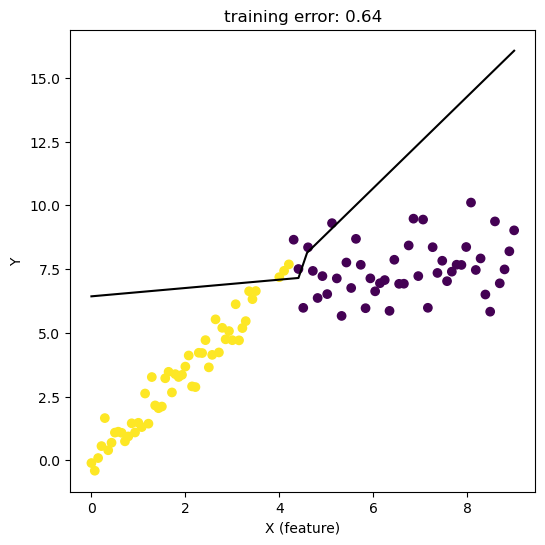

In [20]:
## Fit linear model (lm), with intercept term, using training data with new features
## and then predict using both evaluation and training data, and compute training error

# lm = 
# yhat_eval = 
# yhat_train = 
# mse_train = 

# YOUR CODE HERE
#raise NotImplementedError()
lm = LinearRegression()
lm.fit(xnew_train, y_train)
yhat_eval = lm.predict(xnew_eval)
yhat_train = lm.predict( xnew_train)
mse_train = MSE(y_train, yhat_train)


plt.figure(figsize=(6,6))
plt.plot(x_eval,yhat_eval,'k-')
plt.scatter(x_train,y_train, c=km.labels_)
plt.xlabel('X (feature)')
plt.ylabel('Y')
plt.title("training error: {}".format(round(mse_train,2)))
plt.show()

In [21]:
# This cells is for tests


In [22]:
# This cells is for tests


In [23]:
#You can try constructing features with different values of k, and fitting models with them.
# You can copy-paste some of the previous code, but do not copy 
# entire cells without acttivating them first ("enter" into the cell)

# Bayes Classifier

In this section we will build a naive Bayes classfier for spam detection. Earlier on this course logistic regression was used for classification.

We will be using Youtube comments extracted from five different videos as our training and test data. Each comment is labeled either as spam or ham (non-spam). Class label 1 is used for the spam and class label 0 is used for the ham.

## Loading data

We extract one third of the data set for testing the method later. Let us start by taking a look out our data.

In [24]:
comments = pd.read_csv('youtube_comments.csv')

training_comments = comments[len(comments) // 3:]
testing_comments = comments[:len(comments) // 3]

# Let's print five training examples
training_comments[:5]

,CONTENT,CLASS
551,Check out my YouTube channel I can rap﻿,1
552,I love your songs eminem your the rap god﻿,0
553,Subscribe to me and I'll subscribe back!!!﻿,1
554,I hav absolutely no idea what he's saying. Is ...,0
555,"I love this song, it´s for empowering every wo...",0


## Bayes' Theorem

We want to build a naive Bayesian word based spam classifier based on Bayesian ideas. Let us first remind ourselves of the basic Bayesian concepts. A conditional probability is the probability that a random variable will take on a particular value given that the outcome for another random variable is known. For example, the conditional probability $P(Y = y | X = x)$ is the probability that the variable $Y$ will take on the value $y$, given that the variable $X$ is observed to have the value $x$.

Bayes' theorem is stated mathematically as the following equation:

$$P(Y | X) = \frac{P(Y)\cdot P(X | Y )}{P(X)}.$$

$P(Y | X)$ is the degree of belief in $Y$ after $X$ is observed (*posterior*), which is computed from $P(Y)$, i.e. the initial (*prior*) degree of belief in the hypotesis $Y$, and $\frac{P(X | Y )}{P(X)}$, i.e. the impact of the evidence $X$ on the probability of $Y$. For this reason, Bayes' formula can be intepreted as:

$$\text{posterior} = \frac{\text{prior}\cdot\text{likelihood}}{\text{evidence}}$$

## Bayesian Spam Detection

Numerous different ways to apply the Bayes formula to spam detection exist. We are going to make strong independece assumptions, resulting in so called naive Bayesian classifier.

Let us now denote the spam status of a comment as $S$ s.t $S = 1$ if the comment is spam and $S = 0$ if the comment is not spam. Let us then denote the words of the comment as $W_1, \dots, W_n$. We are going to assume conditional independence of the words $W_i$, given the class label $S$. This can be written mathematically as
$$
P(W_1, \dots, W_n|S) = \prod_{i=1}^n P(W_i|S).
$$

Generally, the words in a comment are not independent. However, considering them as being independent is a useful simplification, since we don't have enough information on the statistical correlations. Therefore, now that we have individual words probabilities inside the class 'spam' and inside the class 'ham', we can combine the probabilities of each of the words in a sentence to compute the probability of the sentence to be spam and the probability to be ham, and train our super naive classifier.

<div class=" alert alert-warning">
    
## Student Task A4.7

Which of the following formulas is the correct posterior probability under the assumptions given above:

1.
$$
P(S=1|W_1, \dots, W_n) =
\frac{
    P(S = 1)\cdot \prod_{i=1}^n P(W_i|S=0)
}{
    P(S = 1) \cdot \prod_{i=1}^n P(W_i|S=0) + P(S = 0) \cdot \prod_{i=1}^n P(wW_i|S=1)
}
$$
2.
$$
P(S=1|W_1, \dots, W_n) =
\frac{
    P(S = 1)\cdot \prod_{i=1}^n P(W_i|S=1)
}{
    P(S = 0) \cdot (\prod_{i=1}^n P(W_i|S=0) + \prod_{i=1}^n P(W_i|S=1))
}
$$
3.
$$
P(S=1|W_1, \dots, W_n) =
\frac{
    P(S = 1)\cdot \prod_{i=1}^n P(W_i|S=1)
}{
    P(S = 1) \cdot \prod_{i=1}^n P(W_i|S=1) + P(S = 0) \cdot \prod_{i=1}^n P(W_i|S=0)
}
$$
    
Write your answer as either $1$, $2$ or $3$ into the variable 
</div>

In [25]:
## create a variable as e.g.:
# correct_posterior = 1

# YOUR CODE HERE
#raise NotImplementedError()
correct_posterior = 3

In [26]:
# this cell is for tests


To calculate the posterior probability we will need the probabilities $P(S = 1) = 1- P(S = 0)$ and $P(W_i|S)$. All of these can be estimated from the data.

Let us start by estimating the probability $P(S = 1)$ as the proportion of the comment being spam out of all the comments in the training data.

<div class=" alert alert-warning">
    
## Student Task A4.8

- Calculate the prior probability for a comment being spam $P(S=1)$ based on our training data set and store the result in variable `prior_spam_probability`.
</div>

In [73]:
## create a variable as:
# prior_spam_probability = # prior probability of a comment being spam based on the training data set

# YOUR CODE HERE
#raise NotImplementedError()
prior_spam_probability = 1 - len(training_comments.query('CLASS == 1')) / len(training_comments)
prior_spam_probability

0.5706521739130435

In [32]:
# this cell is for tests


Next we want to estimate the likelihoods $P(W_i|S = 1)$ and $P(W_i|S = 0)$ which should reflect probility of a random word being that particular word in the given class. Hence we can estimate them by counting the frequency of the word in the class and dividing it by the total amount of words in the class.

Let us start by extracting the frequency of each word in both of the classes.

In [33]:
def find_words(string):
    """Extracts alphanumeric words from a string into a list"""
    return findall("[a-z0-9äö']+", string)

def extract_frequencies(dataframe, column):
    """Extracts frequencies of words from the given column"""
    return dataframe[column].str.lower().apply(find_words).explode().value_counts()

spam_word_frequencies = extract_frequencies(training_comments.query('CLASS == 1'), 'CONTENT')
ham_word_frequencies = extract_frequencies(training_comments.query('CLASS == 0'), 'CONTENT')

Now we can obtain the frequency of given word in either spam comments or ham comments easily:

In [34]:
print(f'Frequency of the word "love" in the spam comments: {spam_word_frequencies["love"]}')
print(f'Frequency of the word "love" in the ham comments": {ham_word_frequencies["love"]}')

Frequency of the word "love" in the spam comments: 22
Frequency of the word "love" in the ham comments": 93


Using the frequencies we can now estimate the likelihoods $P(W_i|S = 1)$ and $P(W_i|S = 0)$ based on the training data.

If a word is not present in the training data of either spam or ham comments, we simply ignore the word. More sophisticated strategies also exist.

<div class=" alert alert-warning">
    
## Student Task A4.9

- Complete the functions `likelihood_spam` and `likelihood_ham`.
 - `likelihood_spam` that should return the estimated probability of a word given that the word is in a spam comment. The word can be assumed to be sampled randomly from all the spam words.
 -  `likelihood_ham` that should return the estimated probability of a word given that the word is in a ham comment. The word can be assumed to be sampled randomly from all the ham words.

The case for word not being present in either of the classes is already dealt with in the implementations. In that case we simply return $1$ as that way the term will cancel out in the final posterior computation.
</div>

In [110]:
def likelihood_spam(word): 
    '''
    Parameter:
    word -- The word for which the likelihood is to be calculated

    Returns:
    Likelihood of the word given that the word is in a spam comment, should return
    1 if the word is not present in either spam or ham training data
    '''
    # If the word is present in both of the classes
    if word in spam_word_frequencies and word in ham_word_frequencies:
        # YOUR CODE HERE
        #raise NotImplementedError()
        return spam_word_frequencies[word] / sum(spam_word_frequencies)
    return 1

def likelihood_ham(word):
    '''
    Parameter:
    word -- The word for which the likelihood is to be calculated

    Returns:
    Likelihood of the word given that the word is in a ham comment, should return
    1 if the word is not present in either spam or ham training data
    '''
    if word in spam_word_frequencies and word in ham_word_frequencies:
        # YOUR CODE HERE
        #raise NotImplementedError()
        return ham_word_frequencies[word] / sum(ham_word_frequencies)
    return 1

In [111]:
# this cell is for tests

np_testing.assert_almost_equal(likelihood_spam('part'), 0.000363735564244794)
np_testing.assert_almost_equal(likelihood_ham('part'), 0.0016826518593303045)
np_testing.assert_equal(likelihood_spam('non-existant-word'), 1.0)
np_testing.assert_equal(likelihood_ham('non-existant-word'), 1.0)
    

In [112]:
# this cell is for tests


Using the implemented functions we can now compute the final posterior probability $P(S=1|w_1 \in W, \dots, w_n \in W)$.

<div class=" alert alert-warning">
    
## Student Task A4.10

- Complete the function `posterior_spam` that should return the estimated posteror probability of a comment being spam.
    
The comment should first be forced into lower case and only unique alphanumeric words should be extracted. Note that the part doing that is already implemented.
</div>

In [129]:
def posterior_spam(comment):
    '''
    Parameter:
    comment -- String containing the comment for which the posterior probability is to be calculated

    Returns:
    Posterior probability of the comment being spam
    '''

    # Comment is forced into lower case and only unique alphanumeric words are extracted.
    words = findall("[a-z0-9äö']+", comment.lower())
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    prior_ham_probability = 1 - prior_spam_probability

    prob_spam_product = 1
    prob_ham_product = 1
    
    for word in words:
        prob_spam_product *= likelihood_spam(word)
        prob_ham_product *= likelihood_ham(word)

    numerator = prior_spam_probability * prob_spam_product
    denominator = (prior_spam_probability * prob_spam_product + prior_ham_probability * prob_ham_product)

    return numerator / denominator

In [130]:
# this cell is for tests

np_testing.assert_almost_equal(
    posterior_spam('This is a test sentence'),
    0.079718869600925)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 0.13271681651551234
 DESIRED: 0.079718869600925

In [125]:
# this cell is for tests


Now we can test our classification algorithm. We classify a comment as spam if the posterior spam probability is larger than $0.5$.

In [126]:
predictions = np.array([posterior_spam(comment) for comment in testing_comments['CONTENT']])
discretized_predictions = predictions > 0.5

labels = testing_comments['CLASS']

In [127]:
accuracy = np.sum(discretized_predictions == labels) / len(testing_comments)

print(f"Classification accuracy: {accuracy}")

Classification accuracy: 0.9019963702359347


If everything is implemented correctly, the classification accuracy should be approximately $0.93$. Let us still plot the confusion matrix for our predictions.

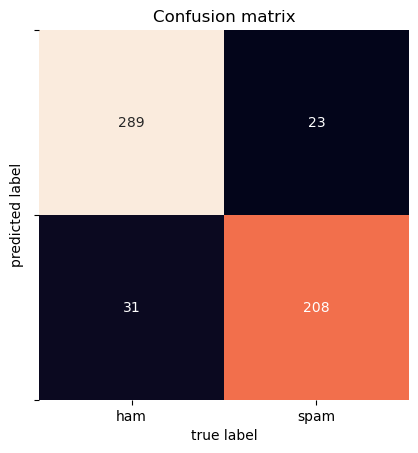

In [128]:
confusion_matrix = calculate_confusion_matrix(labels, discretized_predictions)
heatmap(
    confusion_matrix.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=['ham', 'spam'],
    yticklabels=['ham', 'spam']
)
plt.yticks(range(3))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix')
plt.show()